In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import *
import datetime
import tensorflow as tf

In [3]:
df = pd.read_csv("/content/drive/MyDrive/weatherHistory.csv")
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [4]:
df["date"] = np.zeros(len(df))
for i in range(len(df)):
    df["date"][i] = df["Formatted Date"][i][0:10]


df["time"] = np.zeros(len(df))
for i in range(len(df)):
    df["time"][i] = df["Formatted Date"][i][11:13]
    df["time"]


df["nth_day"] = np.zeros(len(df))
for i in range(len(df)):
    datetime.datetime.strptime(df["date"][i] ,'%Y-%m-%d')
    df["nth_day"][i] = datetime.datetime.strptime(df["date"][i],'%Y-%m-%d').timetuple().tm_yday
    df["nth_day"] = df["nth_day"].to_numpy(int)

df.fillna(0 , inplace=True)

<ipython-input-4-191da875b21b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"][i] = df["Formatted Date"][i][0:10]
<ipython-input-4-191da875b21b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["time"][i] = df["Formatted Date"][i][11:13]
<ipython-input-4-191da875b21b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nth_day"][i] = datetime.datetime.strptime(df["date"][i],'%Y-%m-%d').timetuple().tm_yday


In [5]:
df['date'] = pd.to_datetime(df['date'], yearfirst=True)

df = df.sort_values(by=['date'], ascending=True).reset_index()

df

,index,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,date,time,nth_day
0,2902,2006-01-01 22:00:00.000 +0100,Overcast,rain,5.472222,1.377778,0.87,22.7171,149.0,14.7959,0.0,1009.51,Mostly cloudy throughout the day.,2006-01-01,22,1
1,2903,2006-01-01 23:00:00.000 +0100,Overcast,rain,5.422222,1.666667,0.86,19.5615,148.0,15.6492,0.0,1009.64,Mostly cloudy throughout the day.,2006-01-01,23,1
2,2901,2006-01-01 21:00:00.000 +0100,Overcast,rain,4.933333,0.555556,0.86,23.9407,139.0,15.7297,0.0,1009.43,Mostly cloudy throughout the day.,2006-01-01,21,1
3,2900,2006-01-01 20:00:00.000 +0100,Overcast,rain,5.972222,1.861111,0.80,24.2305,140.0,11.2700,0.0,1009.39,Mostly cloudy throughout the day.,2006-01-01,20,1
4,2899,2006-01-01 19:00:00.000 +0100,Overcast,rain,5.472222,1.100000,0.83,25.4058,145.0,10.9158,0.0,1009.55,Mostly cloudy throughout the day.,2006-01-01,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,89711,2016-12-31 02:00:00.000 +0100,Mostly Cloudy,snow,-1.488889,-4.750000,0.95,8.8711,207.0,7.9856,0.0,1020.48,Mostly cloudy throughout the day.,2016-12-31,02,366
96449,89710,2016-12-31 01:00:00.000 +0100,Mostly Cloudy,snow,-1.161111,-4.394444,0.95,8.9999,203.0,7.3255,0.0,1020.59,Mostly cloudy throughout the day.,2016-12-31,01,366
96450,89709,2016-12-31 00:00:00.000 +0100,Mostly Cloudy,snow,-0.872222,-4.083333,0.94,9.1126,197.0,9.7888,0.0,1020.67,Mostly cloudy throughout the day.,2016-12-31,00,366
96451,89722,2016-12-31 13:00:00.000 +0100,Mostly Cloudy,rain,2.622222,-0.983333,0.83,13.9909,205.0,9.8210,0.0,1020.32,Mostly cloudy throughout the day.,2016-12-31,13,366


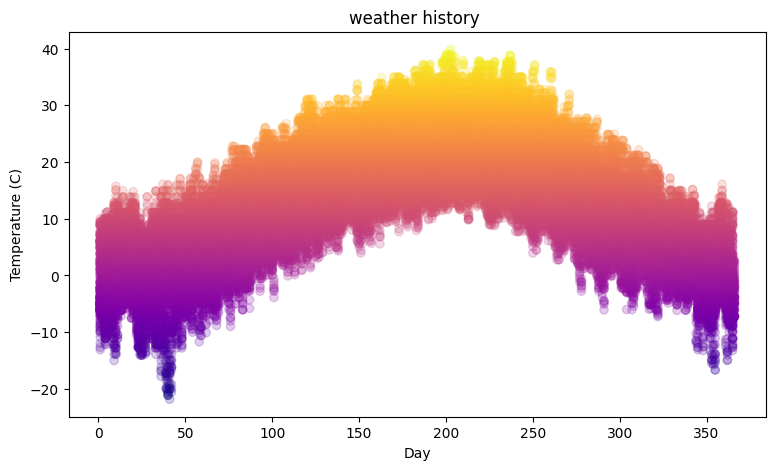

In [6]:
plt.figure(figsize=(9,5))

plt.scatter(df['nth_day'].to_numpy(), df['Temperature (C)'].to_numpy(), c=df['Temperature (C)'], cmap='plasma' ,alpha=0.2)
plt.title("weather history ")
plt.xlabel("Day")
plt.ylabel("Temperature (C)")
plt.show()

In [12]:
X = np.array(df[['nth_day']])
y = np.array(df[['Temperature (C)']])


X_train , X_test , Y_train , Y_test = train_test_split( X , y  , test_size= 0.2 , shuffle=True)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
Y_train = Y_train.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

from sklearn.linear_model import LinearRegression
model = tf.keras.models.Sequential([ tf.keras.layers.Dense(1 , activation="sigmoid"),
                                     tf.keras.layers.Dense(64 , activation="relu"),
                                     tf.keras.layers.Dense(32 , activation="relu"),
                                     tf.keras.layers.Dense(16 , activation=tf.keras.layers.LeakyReLU()),
                                     tf.keras.layers.Dense(1 , activation="linear")])


(77162, 1) (19291, 1) (77162, 1) (19291, 1)


In [13]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.0001) , loss= tf.keras.losses.mean_absolute_error  )
x = model.fit(X_train , Y_train ,epochs=20)

Epoch 1/20
2412/2412 [==============================] - 6s 2ms/step - loss: 8.9108
Epoch 2/20
2412/2412 [==============================] - 5s 2ms/step - loss: 7.7309
Epoch 3/20
2412/2412 [==============================] - 7s 3ms/step - loss: 6.6880
Epoch 4/20
2412/2412 [==============================] - 5s 2ms/step - loss: 6.3919
Epoch 5/20
2412/2412 [==============================] - 5s 2ms/step - loss: 6.3760
Epoch 6/20
2412/2412 [==============================] - 7s 3ms/step - loss: 6.3676
Epoch 7/20
2412/2412 [==============================] - 5s 2ms/step - loss: 6.3611
Epoch 8/20
2412/2412 [==============================] - 5s 2ms/step - loss: 6.3536
Epoch 9/20
2412/2412 [==============================] - 7s 3ms/step - loss: 6.3470
Epoch 10/20
2412/2412 [==============================] - 5s 2ms/step - loss: 6.3400
Epoch 11/20
2412/2412 [==============================] - 5s 2ms/step - loss: 6.3317
Epoch 12/20
2412/2412 [==============================] - 7s 3ms/step - loss: 6.3127
E

603/603 [==============================] - 1s 1ms/step


Calculating regression quality metrics
MSE =  27.76742239058585
R2 =  0.6958630200282244


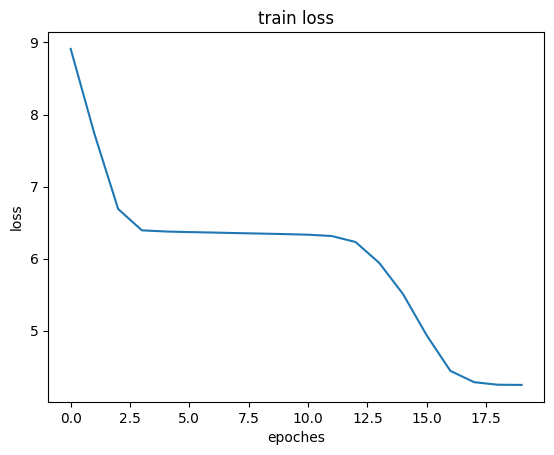

In [14]:
y_pred = model.predict(X_test)

print("\n\nCalculating regression quality metrics")
print("MSE = ",mean_squared_error(Y_test, y_pred))
print("R2 = ",r2_score(Y_test, y_pred))


plt.plot(x.history["loss"])
plt.xlabel("epoches")
plt.ylabel("loss")
plt.title("train loss")
plt.show()

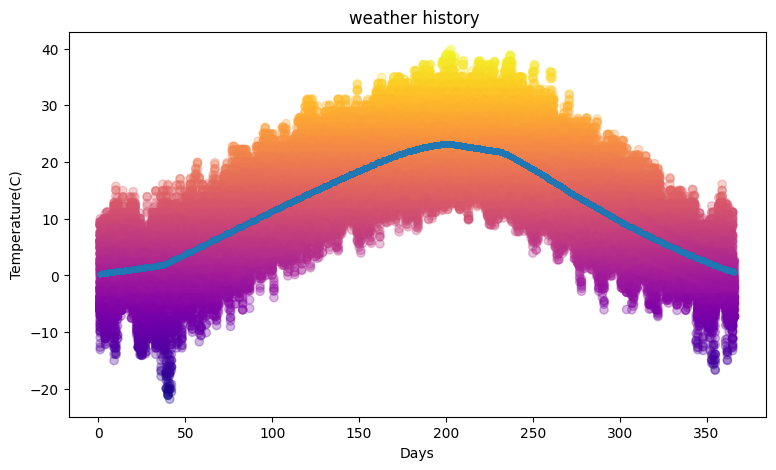

In [15]:
plt.figure(figsize=(9,5))

plt.scatter(df['nth_day'].to_numpy(), df['Temperature (C)'].to_numpy(),alpha=0.3, c=df['Temperature (C)'], cmap='plasma')

plt.plot(X_test , y_pred , "." )
plt.title("weather history ")
plt.xlabel("Days")
plt.ylabel("Temperature(C)")
plt.show()

In [16]:
model.evaluate(X_test , Y_test)

603/603 [==============================] - 1s 2ms/step - loss: 4.2286


4.228579521179199